<a href="https://colab.research.google.com/github/martinjamouss/ML-Lab/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [7]:
df = pd.read_csv("/content/gdrive/MyDrive/bank-additional-full.csv", sep = ";")

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [10]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

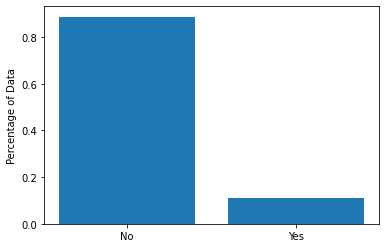

In [12]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [13]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [15]:
###############
###TRANSFORM###
###############

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_scaled, y_train)

X_scaled = X_SMOTE
y_train = y_SMOTE

y_train = np.array(y_train['yes'])

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [16]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.138\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.453\ngini = 0.301\nsamples = 20522\nvalue = [16740, 3782]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.128\nsamples = 11668\nvalue = [10863, 805]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.108\nsamples = 11409\nvalue = [10757, 652]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.484\nsamples = 259\nvalue = [106, 153]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.321\ngini = 0.446\nsamples = 8854\nvalue = [5877, 2977]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.494\nsamples = 6472\nvalue = [3587, 2885]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.074\nsamples = 2382\nvalue = [2290, 92]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.411\nsamples = 30638\nvalue = [8840, 21798]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.723\ngini = 0.331\nsamples = 25237\nvalue = [5279, 19958]\ncla

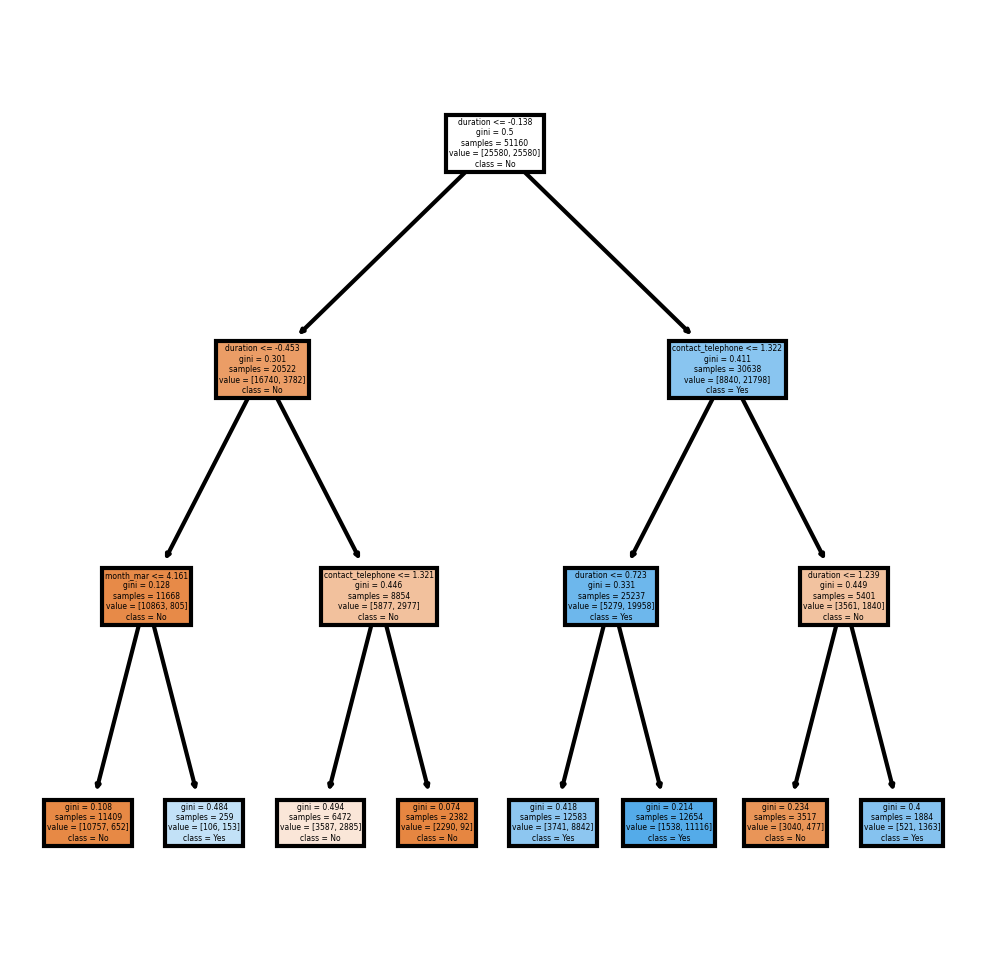

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [18]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

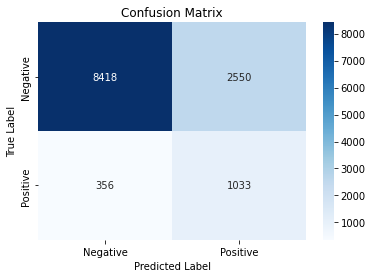

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [20]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7535809662539451


In [21]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

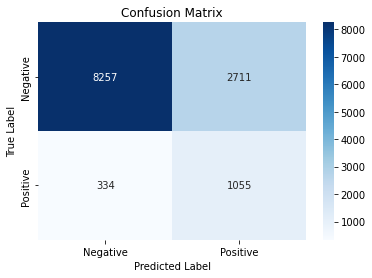

In [22]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [25]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

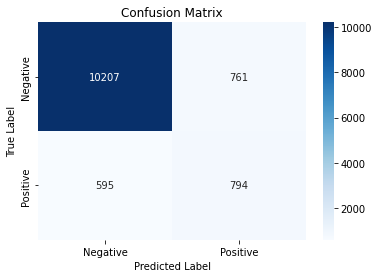

In [26]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [14]:
#pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 8.7 MB/s eta 0:00:00


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
####IMPORT MORE BASE LEARNERS####
from sklearn.neighbors import KNeighborsClassifier
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [28]:
### SET YOUR BASE LEARNERS
base_learners = [
    LogisticRegression(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors = 1),
    KNeighborsClassifier(n_neighbors = 5),
    LogisticRegression(penalty = 'l1', solver='liblinear')
]

super_learner = SuperLearner()
super_learner.add(base_learners)

### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_predictions = super_learner.predict(X_scaled)

In [29]:
### TRAIN YOUR METALEARNER
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions, y_train)

In [30]:
### INTERPRET COEFFICIENTS
log_reg.coef_

array([[ 8.95762038, -4.79865312, -2.60820248, -2.72400044,  8.95762038]])

logistic regression and lasso logistic regression perform the best

In [34]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIx
base_predictions_test = super_learner.predict(X_test)

y_pred = log_reg.predict(base_predictions_test)
y_true = y_test
cm_super = confusion_matrix(y_true, y_pred)


class_labels = ['Negative', 'Positive']

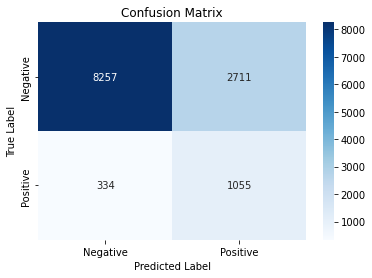

In [35]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [36]:
cms = [cm_raw, cm_bag, cm_boost, cm_super]

sensitivities = []
specificities = []
for cm in cms:
  TN = cm[0][0]
  TP = cm[1][1]
  FP = cm[0][1]
  FN = cm[1][0]

  sensitivity = TP / (TP + FN)
  sensitivities.append(sensitivity)

  specificity = TN / (TN + FP)
  specificities.append(specificity)

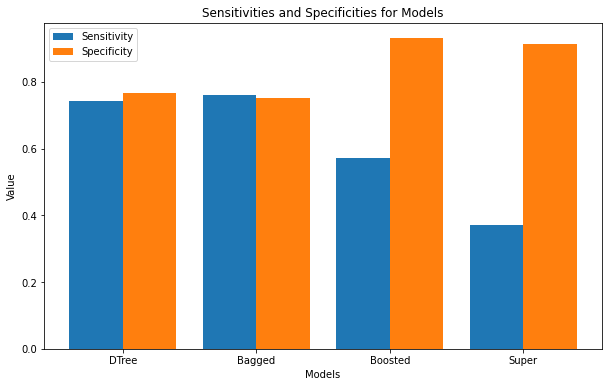

In [49]:
plt.figure(figsize = (10, 6))

models = ['DTree', 'Bagged', 'Boosted', 'Super']
X_axis = np.arange(len(models))

plt.bar(X_axis - 0.2, sensitivities, 0.4, label = 'Sensitivity')
plt.bar(X_axis + 0.2, specificities, 0.4, label = 'Specificity')

plt.xticks(X_axis, models)
plt.title('Sensitivities and Specificities for Models')
plt.ylabel("Value")
plt.xlabel('Models')
plt.legend()
plt.show()